## Exploring the Data

In [1]:
import pandas as pd
df = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

In [2]:
df.sort_values('FavoriteCount', ascending = False).head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
3139,48531,2019-04-03 15:16:24,45,7278,<data-wrangling>,9,16.0
768,56676,2019-07-31 11:06:16,26,8373,<machine-learning><deep-learning>,7,11.0
4233,49522,2019-04-18 08:06:24,18,6328,<activation-function><bert><mathematics>,2,8.0
2259,47142,2019-03-12 10:04:15,13,3207,<machine-learning><neural-network><deep-learni...,4,7.0
3175,47787,2019-03-22 13:02:40,11,2044,<machine-learning><neural-network>,2,7.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


>Issues:
* missing values: there are 7432 missing values in the 'FavoriteCount' column. All other columns are complete;
* fixing the missing values: we could  fill them with '0';
* column data types: after filling the missing values in 'FavoriteCount' we can change the column from 'float' to 'int';




## Cleaning the Data

In [4]:
df['FavoriteCount'].fillna(0, inplace=True)

In [5]:
df['FavoriteCount'].value_counts()

0.0     7607
1.0      953
2.0      205
3.0       43
4.0       12
5.0        8
6.0        4
7.0        4
11.0       1
8.0        1
16.0       1
Name: FavoriteCount, dtype: int64

In [6]:
df['FavoriteCount']=df['FavoriteCount'].astype('int')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [8]:
df['Tags']=df['Tags'].str.replace('><', ',').str.replace('<','').str.replace('>', '')

In [9]:
df['Tags'].head()

0                         machine-learning,data-mining
1    machine-learning,regression,linear-regression,...
2              python,time-series,forecast,forecasting
3                    machine-learning,scikit-learn,pca
4                  dataset,bigdata,data,speech-to-text
Name: Tags, dtype: object

In [10]:
questions=df.copy()

In [11]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0


In [12]:
q_split = questions['Tags'].str.split(',',expand=True)

In [13]:
q_split

,0,1,2,3,4
0,machine-learning,data-mining,None,None,None
1,machine-learning,regression,linear-regression,regularization,None
2,python,time-series,forecast,forecasting,None
3,machine-learning,scikit-learn,pca,None,None
4,dataset,bigdata,data,speech-to-text,None
5,fuzzy-logic,None,None,None,None
6,time-series,anomaly-detection,online-learning,None,None
7,matrix-factorisation,None,None,None,None
8,correlation,naive-bayes-classifier,None,None,None
9,machine-learning,python,deep-learning,keras,cnn


In [14]:
q_stacked = q_split.stack().reset_index()

In [70]:
count_tag_use=q_stacked[0].value_counts()

In [16]:
q_concat = pd.concat([questions,q_split], axis=1, join='outer')

In [17]:
q_concat.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,0,1,2,3,4
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0,machine-learning,data-mining,None,None,None
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0,machine-learning,regression,linear-regression,regularization,None
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0,python,time-series,forecast,forecasting,None
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0,machine-learning,scikit-learn,pca,None,None
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0,dataset,bigdata,data,speech-to-text,None


In [27]:
sum_0=q_concat[[0,'ViewCount']].groupby(0).sum().copy()

In [28]:
sum_1=q_concat[[1,'ViewCount']].groupby(1).sum().copy()

In [29]:
sum_2=q_concat[[2,'ViewCount']].groupby(2).sum().copy()

In [30]:
sum_3=q_concat[[3,'ViewCount']].groupby(3).sum().copy()

In [31]:
sum_4=q_concat[[4,'ViewCount']].groupby(4).sum().copy()

In [37]:
sum_total=pd.concat([sum_0, sum_1, sum_2, sum_3, sum_4])

In [49]:
sum_total.groupby(sum_total.index).sum().sort_values('ViewCount', ascending = False)

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


In [65]:
tot = pd.DataFrame()
for i in range(5):
    tot = pd.concat([tot,q_concat[[i,'ViewCount']].groupby(i).sum().copy()])

In [69]:
count_tag_views = tot.groupby(tot.index).sum().sort_values('ViewCount', ascending = False)

In [71]:
count_tag_use.head(10)

machine-learning    2693
python              1814
deep-learning       1220
neural-network      1055
keras                935
classification       685
tensorflow           584
scikit-learn         540
nlp                  493
cnn                  489
Name: 0, dtype: int64

In [72]:
count_tag_views.head(10)

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


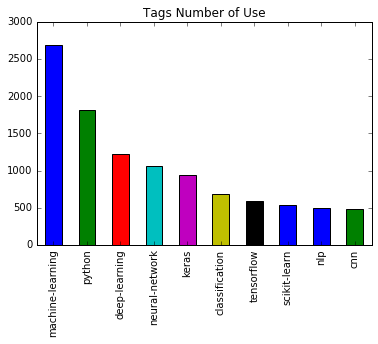

In [82]:
%matplotlib inline
count_tag_use.head(10).plot(kind='bar', title = 'Tags Number of Use')

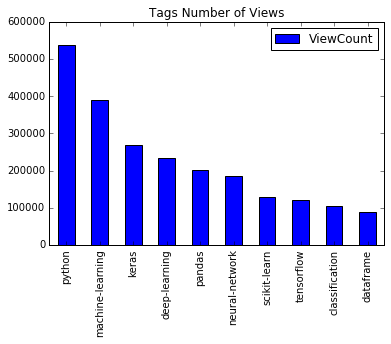

In [83]:
count_tag_views.head(10).plot(kind='bar', title = 'Tags Number of Views')

## Is deep learning just a fad?

In [84]:
all_q = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])

In [85]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [90]:
all_q['T2']=all_q['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','')

In [93]:
all_q['T2']=all_q['T2'].str.split(',')

In [94]:
all_q.head()

,Id,CreationDate,Tags,T2
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,<neural-network>,[neural-network]
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,<keras>,[keras]
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...,"[r, predictive-modeling, machine-learning-mode..."


In [106]:
all_q['month']=all_q['CreationDate'].dt.month.astype('str')
all_q['year']=all_q['CreationDate'].dt.year.astype('str')

In [114]:
all_q['month']=all_q['month'].apply(lambda m:'0'+m if len(m)==1 else m)

In [116]:
all_q['yyyymm']=all_q['year']+all_q['month']

In [118]:
deep_q = all_q[all_q['T2'].apply(lambda t: True if 'deep-learning' in t else False)]

In [122]:
deep_q[['yyyymm','T2']].groupby('yyyymm').count()

,T2
yyyymm,
201406,1
201407,1
201410,1
201411,1
201412,4
201502,1
201503,2
201504,1
201505,3


In [123]:
all_q[['yyyymm','T2']].groupby('yyyymm').count()

,T2
yyyymm,
201405,58
201406,99
201407,76
201408,65
201409,48
201410,71
201411,64
201412,81
201501,63


In [129]:

100*deep_q[['yyyymm','T2']].groupby('yyyymm').count()/all_q[['yyyymm','T2']].groupby('yyyymm').count()

,T2
yyyymm,
201405,NaN
201406,1.010101
201407,1.315789
201408,NaN
201409,NaN
201410,1.408451
201411,1.562500
201412,4.938272
201501,NaN
